In [1]:
from medmnistc.corruptions.registry import CORRUPTIONS_DS
from domgen.augment._visualize import plot_images_from_folder

from pathlib import Path
from PIL import Image
import numpy as np

C:\Users\ahler\Projekt xAI\.venv\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
original_image_path = "../imgs/original/camelyon17/patch_patient_004.png"

pathmnist_corruptions = CORRUPTIONS_DS.get("pathmnist", {})

output_dir = Path("../imgs/augmented/camelyon17/diSalvo")
output_dir.mkdir(parents=True, exist_ok=True)

severity = 3
for corruption_name, corruption_instance in pathmnist_corruptions.items():
    print(f"Applying corruption: {corruption_name} with severity {severity}")
    
    original_image_pil = Image.open(original_image_path)
        
    if original_image_pil.mode == 'RGBA':
        original_image_pil = original_image_pil.convert('RGB')
    
    corrupted_image = corruption_instance.apply(original_image_pil, severity=severity)
    
    if isinstance(corrupted_image, np.ndarray):
        corrupted_image_pil = Image.fromarray(corrupted_image)
    else:
        corrupted_image_pil = corrupted_image
        
    output_path = output_dir / f"{corruption_name.lower().replace(' ', '_')}_sev{severity}.png"
    corrupted_image_pil.save(output_path, format='JPEG')
    print(f"Saved PNG image at: {output_path}")



Applying corruption: pixelate with severity 3
Saved PNG image at: ..\imgs\augmented\camelyon17\diSalvo\pixelate_sev3.png
Applying corruption: jpeg_compression with severity 3
Saved PNG image at: ..\imgs\augmented\camelyon17\diSalvo\jpeg_compression_sev3.png
Applying corruption: defocus_blur with severity 3
Saved PNG image at: ..\imgs\augmented\camelyon17\diSalvo\defocus_blur_sev3.png
Applying corruption: motion_blur with severity 3
Saved PNG image at: ..\imgs\augmented\camelyon17\diSalvo\motion_blur_sev3.png
Applying corruption: brightness_up with severity 3
Saved PNG image at: ..\imgs\augmented\camelyon17\diSalvo\brightness_up_sev3.png
Applying corruption: brightness_down with severity 3
Saved PNG image at: ..\imgs\augmented\camelyon17\diSalvo\brightness_down_sev3.png
Applying corruption: contrast_up with severity 3
Saved PNG image at: ..\imgs\augmented\camelyon17\diSalvo\contrast_up_sev3.png
Applying corruption: contrast_down with severity 3
Saved PNG image at: ..\imgs\augmented\came

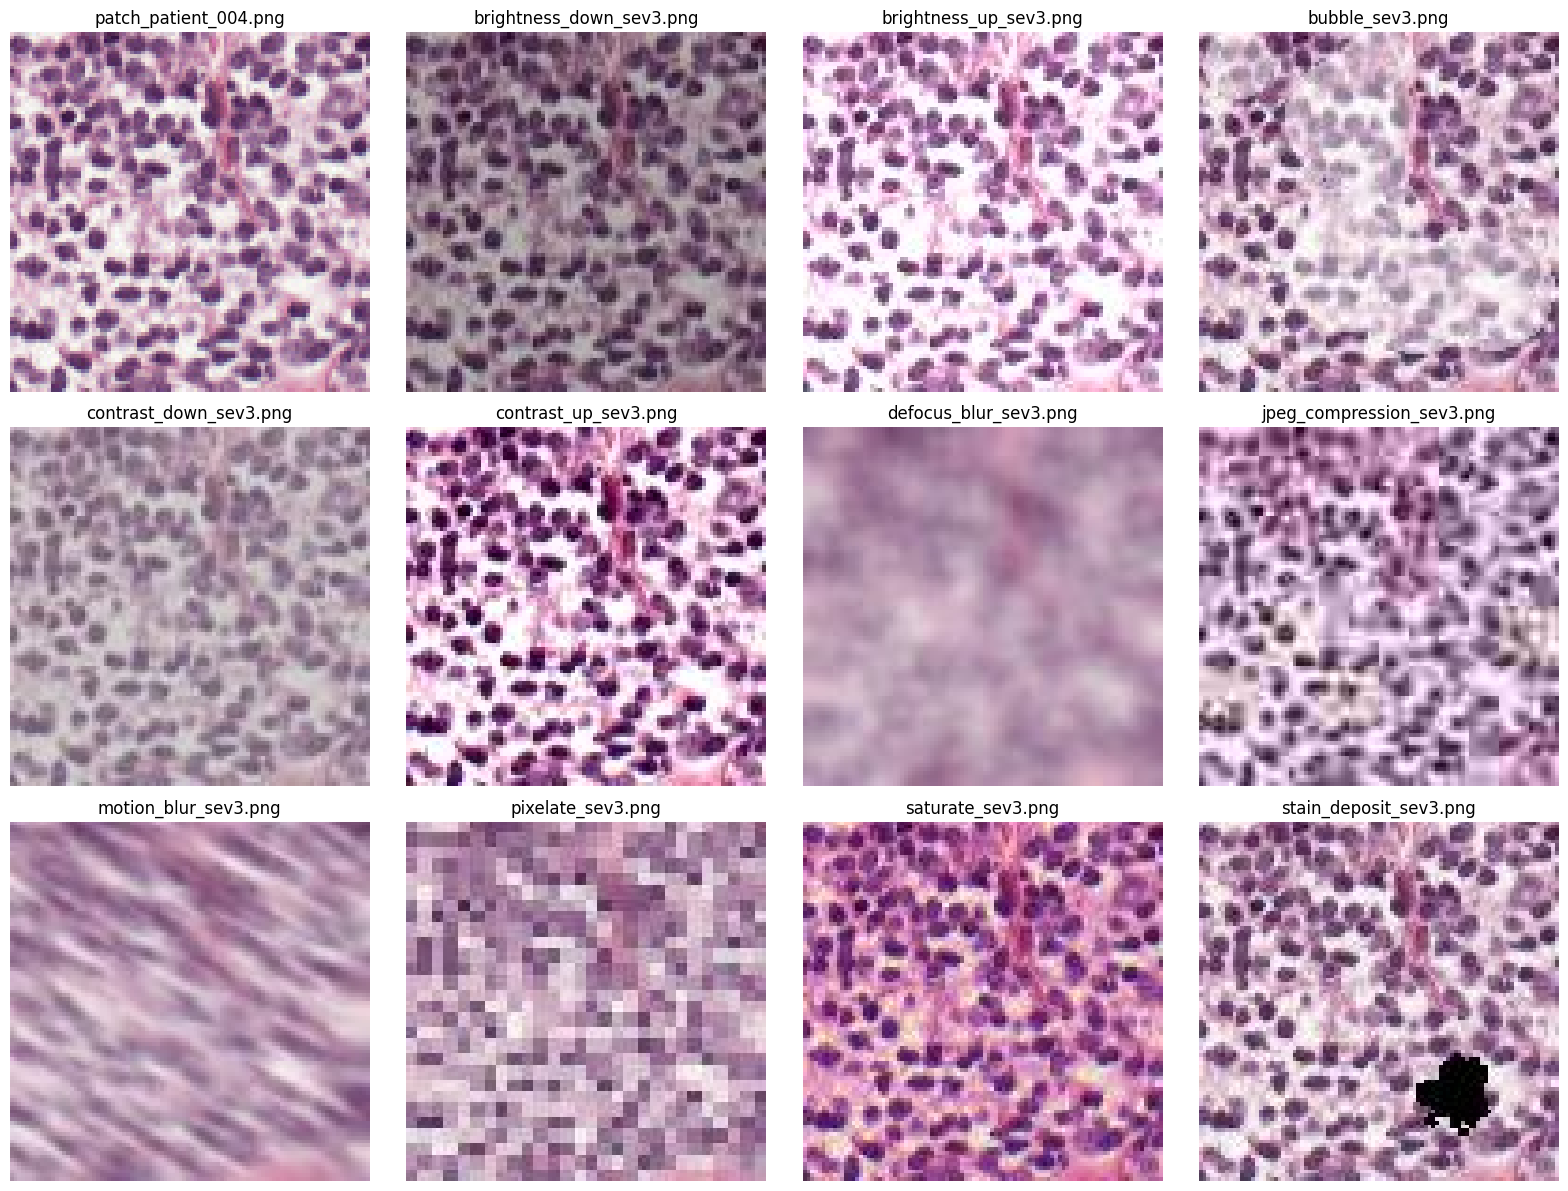

In [5]:
folder_path = "../imgs/augmented/camelyon17/diSalvo"
original_image_path = "../imgs/original/camelyon17/patch_patient_004.png"
plot_images_from_folder(folder_path, original_image_path, grid_cols=4)